In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import morton
import os

### Constants

In [6]:
OFFSET = 10
FACTOR_MULTIPLY = 10000

### Read file

In [7]:
#df = pd.read_csv('data/lane_changes_updated/lane_change_8.csv', sep=';')
#df = pd.read_csv('data/normal_drive.csv', sep=';')
#df = pd.read_csv('data/lane_changes_updated/lane_change_1.csv', sep=';')
#df = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/20Hz/Vehicle-IMU-Acceleration-31.csv', sep=';')
#df['ts'] = (df['sampleTimeStamp.seconds']*1000000)+df['sampleTimeStamp.microseconds']
#df_Accel = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/10Hz/Vehicle-IMU-Acceleration-24.csv', sep=';')
#df_Accel['ts'] = (df_Accel['sampleTimeStamp.seconds']*1000000)+df_Accel['sampleTimeStamp.microseconds']
#df_Accel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

#df_AngularVel = pd.read_csv('data/2022-09-21_LaneChanges/AngularVelocities_Separated/Vehicle-IMU-AngularVelocities-50Hz-30.csv', sep=';')
#df_AngularVel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

#df = pd.concat([df_Accel, df_AngularVel], axis=1)
#df = pd.read_csv('data/lane_changes/20Hz/lane_change_1.csv', sep=';')
#df = pd.read_csv('data/lane_changes/normal_drive.csv', sep=';')



# LATEST: 
df_Accel = pd.read_csv('data/2022-09-21_LaneChanges/Accel_Separated/10Hz/with_noise/Vehicle-IMU-Acceleration-24.csv', sep=';')
df_Accel['ts'] = (df_Accel['sampleTimeStamp.seconds']*1000000)+df_Accel['sampleTimeStamp.microseconds']
df_Accel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df_Steering = pd.read_csv('data/2022-09-21_LaneChanges/SteeringWheelAngle_Separated/10Hz/with_noise/SteeringWheelAngle-24.csv', sep=';')
df_Steering.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df = pd.concat([df_Accel, df_Steering], axis=1)

df


#df = df.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

FileNotFoundError: [Errno 2] No such file or directory: 'data/2022-09-21_LaneChanges/Accel_Separated/10Hz/with_noise/Vehicle-IMU-Acceleration-24.csv'

In [ ]:
# Reading other files for CSP analysis of different maneouvres
# Plotting braking_cut shows us that certain parts of the resulting CSP are the same as with the lane change.
#df = pd.read_csv('data/braking_cut.csv', sep=';')
#df = pd.read_csv('data/braking_and_lanechange.csv', sep=';')

### Apply constants

In [8]:
df['IMULgtAcceleration']=df['IMULgtAcceleration'].add(OFFSET)
df['IMULatAcceleration']=df['IMULatAcceleration'].add(OFFSET)
df['SteeringWhlAngle']=df['SteeringWhlAngle'].add(OFFSET)

df['IMULgtAcceleration'] = df.apply(lambda x: int(x['IMULgtAcceleration']*FACTOR_MULTIPLY) , axis=1)
df['IMULatAcceleration'] = df.apply(lambda x: int(x['IMULatAcceleration']*FACTOR_MULTIPLY) , axis=1)
df['SteeringWhlAngle'] = df.apply(lambda x: int(x['SteeringWhlAngle']*FACTOR_MULTIPLY) , axis=1)

### Morton indexing

In [9]:
#resolution = 18; dimension = 2
#hilbert_curve = HilbertCurve(resolution, dimension, n_procs=-1)

#points = df[['accel_lon','accel_trans']].to_numpy()

# Generate Hilbert index
#distances = hilbert_curve.distances_from_points(points)

# Add Hilbert index to 'hilbert' column
#df_hilbert = pd.concat([df, pd.DataFrame(distances, columns = ['hilbert'] )], axis=1)
m = morton.Morton(dimensions=2, bits=18)

def set_value(row):
    return m.pack(int(row['IMULatAcceleration']), int(row['SteeringWhlAngle']))

df['morton'] = df.apply(set_value, axis=1)
df

,sent.seconds,sent.microseconds,received.seconds,received.microseconds,sampleTimeStamp.seconds,sampleTimeStamp.microseconds,IMULatAcceleration,IMULgtAcceleration,IMUVerAcceleration,ts,sent.seconds.1,sent.microseconds.1,received.seconds.1,received.microseconds.1,sampleTimeStamp.seconds.1,sampleTimeStamp.microseconds.1,SteeringWhlAngle,morton
0,1584853141,44198,1584853141,44222,1584853141,44154,97195,97875,9.7495,1584853141044154,1584853141,28580,1584853141,28619,1584853141,25862,100458,15397645517
1,1584853141,144374,1584853141,144417,1584853141,144304,96940,96855,9.8345,1584853141144304,1584853141,130047,1584853141,130086,1584853141,125534,100449,15397579858
2,1584853141,250932,1584853141,250970,1584853141,244475,97535,97535,9.8090,1584853141244475,1584853141,240774,1584853141,240798,1584853141,225935,100410,15398363101
3,1584853141,344649,1584853141,344681,1584853141,344147,97365,98215,9.5965,1584853141344147,1584853141,330220,1584853141,330248,1584853141,325874,100390,15398345017
4,1584853141,444695,1584853141,444727,1584853141,444323,98385,97535,9.6985,1584853141444323,1584853141,427078,1584853141,427127,1584853141,425525,100361,16114520451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,1584853161,520339,1584853161,520386,1584853161,514176,106375,106545,9.6645,1584853161514176,1584853161,507339,1584853161,507380,1584853161,505853,104335,16164831423
205,1584853161,619594,1584853161,619645,1584853161,614145,105695,105695,9.8685,1584853161614145,1584853161,606564,1584853161,606591,1584853161,605724,105097,16170668503
206,1584853161,714517,1584853161,714584,1584853161,714429,106969,105695,9.4860,1584853161714429,1584853161,707300,1584853161,707332,1584853161,706081,105146,16215825353
207,1584853161,818675,1584853161,818711,1584853161,814181,107735,105440,9.5625,1584853161814181,1584853161,806167,1584853161,806190,1584853161,805862,104697,16216292247


### Morton Plots

### Scatter Plots

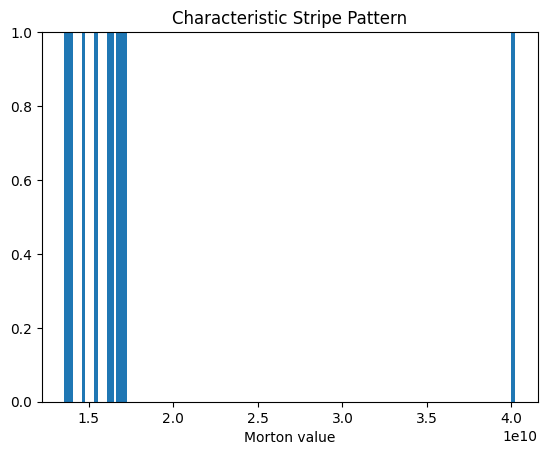

In [10]:
# 'bins' explained: https://www.metabase.com/glossary/bin

# What 'bins' value is best?
plt.hist(df['morton'], bins=200)

min = df['morton'].min()
max = df['morton'].max()
max = 30000000000
#max = 20000000000

# limit y axis to 1 to show binary presence of data point
plt.ylim(0,1)
#plt.xlim(1,max)
# limit x axis to take only "lane change relevant" data
#plt.xlim(9000000000,13000000000)
plt.xlabel('Morton value')

plt.title("Characteristic Stripe Pattern")

plt.show()

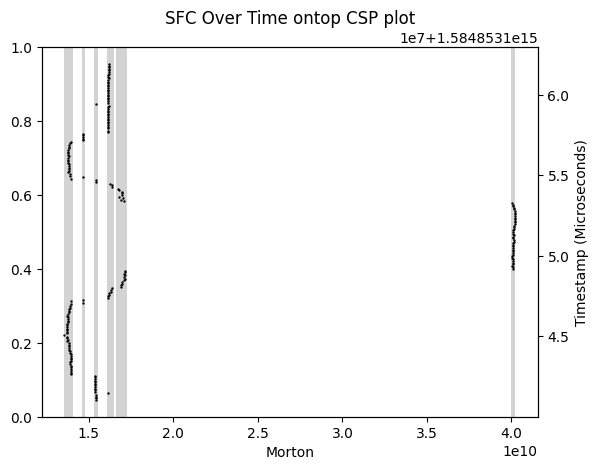

In [11]:
fig, ax = plt.subplots()

ax.hist(df['morton'], bins=200, color='lightgray')
ax.set_ylim([0,1])
#ax.set_xlim([0, 40000000000])

ax2 = ax.twinx()

ax2.scatter(x=df['morton'],y=df['ts'], c='black', s=0.5)

ax.set_xlabel('Morton')

ax2.set_title("SFC Over Time ontop CSP plot")
ax2.set_ylabel('Timestamp (Microseconds)')

plt.show()

##### 

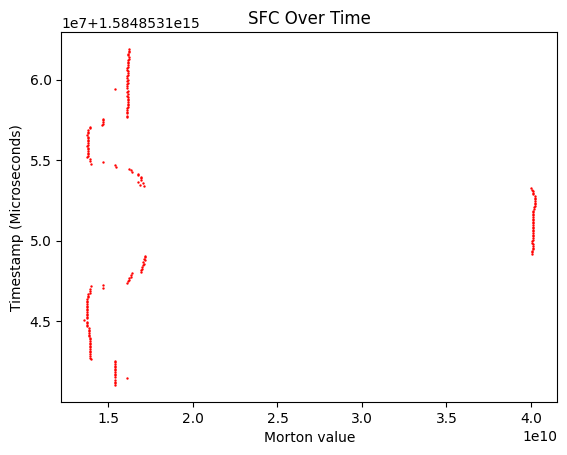

In [12]:
plt.scatter(x=df['morton'],y=df['ts'], c='red', s=0.5)
plt.title("SFC Over Time")
plt.xlabel("Morton value")
plt.ylabel("Timestamp (Microseconds)")
plt.show()
#output_df.plot(x = 'ts', y = ['accel_lon', 'accel_trans'], title="Accelerations against Timestamp", xlabel="Timestamp (Microseconds)", ylabel="Acceleration (m/s\u00B2)")

#plt.savefig('MortonScatterTest9.png', transparent=True)

In [13]:
# 2D-plot with timestamp as color gradient
#df.plot(kind='scatter',x='SteeringWhlAngle',y='IMULatAcceleration',color=df['ts'])
#df.plot(kind='scatter',x='accel_lon',y='accel_trans',color=df['ts'])

In [14]:
#creating 3D-Plot
#ax = plt.axes(projection ="3d")
#ax.scatter3D(df['SteeringWhlAngle'],df['IMULatAcceleration'], color = "green")

### multidimensional plot

<Axes: title={'center': 'Lateral acceleration and Steering angle against Timestamp'}, xlabel='Timestamp (Microseconds)', ylabel='Steering Angle (°) | Lateral Acceleration (m/s²)'>

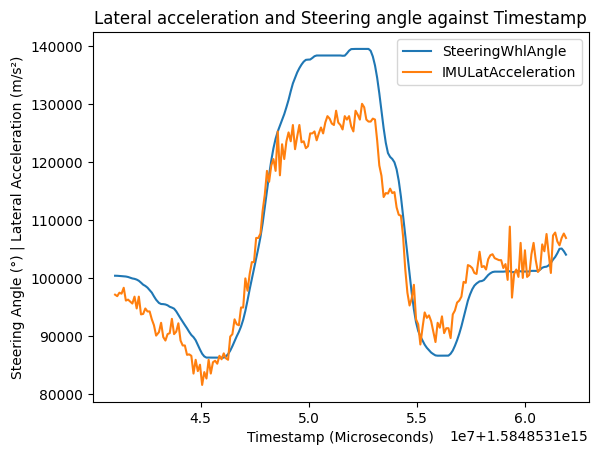

In [15]:
# Plot result
#df.plot(x = 'IMULatAcceleration', y = 'SteeringWhlAngle')
df.plot(x='ts', y=['SteeringWhlAngle', 'IMULatAcceleration'], title='Lateral acceleration and Steering angle against Timestamp', xlabel='Timestamp (Microseconds)', ylabel='Steering Angle (°) | Lateral Acceleration (m/s\u00B2)')


# Connect roundabout sensors

In [16]:
# read steering/accel data
df_Accel = pd.read_csv('SnowFox-Roundabout-Dataset/SnowFox-Roundabout-Dataset/Extracted_Roundabouts/separated/RB-accel2.csv', sep=';')
df_Accel['ts'] = (df_Accel['sampleTimeStamp.seconds']*1000000)+df_Accel['sampleTimeStamp.microseconds']
df_Accel.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df_Steering = pd.read_csv('SnowFox-Roundabout-Dataset/SnowFox-Roundabout-Dataset/Extracted_Roundabouts/separated/RB-steering2.csv', sep=';')
#df_Steering['ts'] = (df_Steering['sampleTimeStamp.seconds']*1000000)+df_Steering['sampleTimeStamp.microseconds']
df_Steering.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

df_Steering = df_Steering.add_suffix('.1') # add suffix to prevent duplicate columns


df = pd.concat([df_Accel, df_Steering], axis=1)

 #Confirm time is aligned between the steering and acceleration sensors
print(df['sampleTimeStamp.seconds'].equals(df['sampleTimeStamp.seconds.1']))
dfCheck = df
print(dfCheck.loc[~(dfCheck['sampleTimeStamp.seconds'] == dfCheck['sampleTimeStamp.seconds.1'])])
print(df.isnull().values.any())
df = df.rename(columns = lambda colName: colName.replace('.1', '') )


# Read GPS data
#df_Gps = pd.read_csv('data/2022-09-21_LaneChanges/GPS-20Hz.csv', sep=';')
#df_Gps['ts'] = (df_Gps['sampleTimeStamp.seconds']*1000000)+df_Gps['sampleTimeStamp.microseconds']
#df_Gps.drop(columns=['sampleTimeStamp.seconds', 'sampleTimeStamp.microseconds'])

# Get the time range in which the lane change takes place.
#timeMin = df['ts'].min()
#timeMax = df['ts'].max()


# Extract specific lane change timeframe
#df_Gps = df_Gps[(df_Gps['ts'] >= timeMin) & (df_Gps['ts'] <= timeMax)]

True
Empty DataFrame
Columns: [sent.seconds, sent.microseconds, received.seconds, received.microseconds, sampleTimeStamp.seconds, sampleTimeStamp.microseconds, IMULatAcceleration, IMULgtAcceleration, IMUVerAcceleration, ts, sent.seconds.1, sent.microseconds.1, received.seconds.1, received.microseconds.1, sampleTimeStamp.seconds.1, sampleTimeStamp.microseconds.1, SteeringWhlAngle.1]
Index: []
False


<Axes: title={'center': 'Lateral acceleration and Steering angle against Timestamp'}, xlabel='Timestamp (Microseconds)', ylabel='Steering Angle (°) | Lateral Acceleration (m/s²)'>

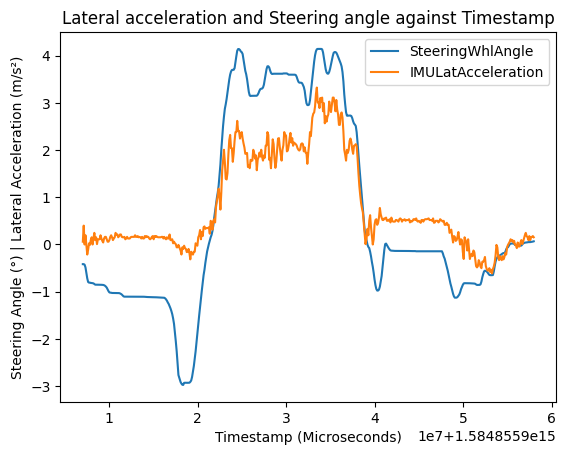

In [17]:
# Plot sensor data against ts, and plot gps data

#start = 145
#end = 190

# sensor against ts
output_df_sens = df
#output_df_sens = df.iloc[start:end]

# Get the time range in which the lane change takes place.
#timeMin = output_df_sens['ts'].min()
#timeMax = output_df_sens['ts'].max()



output_df_sens.plot(x='ts', y=['SteeringWhlAngle', 'IMULatAcceleration'], title='Lateral acceleration and Steering angle against Timestamp', xlabel='Timestamp (Microseconds)', ylabel='Steering Angle (°) | Lateral Acceleration (m/s\u00B2)')

# gps
#output_df_gps = df_Gps
#output_df_gps = df_Gps[(df_Gps['ts'] >= timeMin) & (df_Gps['ts'] <= timeMax)]
#output_df_gps.plot(x = 'longitude', y = 'latitude', title="GPS plot", xlabel="Longitude", ylabel="Latitude", legend=False)


In [18]:
# Save the lc
output_df_sens.to_csv("SnowFox-Roundabout-Dataset/SnowFox-Roundabout-Dataset/Extracted_Roundabouts/roundabout-2.csv", sep=";", index=False)

# Output all noise files

In [19]:
# Loop through noise files, and output CSP, SFC-over-time and Sensor/time plots
accelerationNoiseFolder = "data/2022-09-21_LaneChanges/Accel_Separated/10Hz/with_noise"
steeringWhlAngleNoiseFolder = "data/2022-09-21_LaneChanges/SteeringWheelAngle_Separated/10Hz/with_noise/"
#print(len(os.listdir(accelerationNoiseFolder)))
#print(len(os.listdir(steeringWhlAngleNoiseFolder)))

amountOfNoiseFiles = 15 # defines the number of total noise files for each sensor

# For both folders at the same time combine into 1 df.
for accelNoiseFile, steeringWhlNoiseFile in zip(sorted(os.listdir(accelerationNoiseFolder)), sorted(os.listdir(steeringWhlAngleNoiseFolder))):
    if int(accelNoiseFile[-6:-4]) > 15 or int(steeringWhlNoiseFile[-6:-4]) > 15:
        break
    print(accelNoiseFile, " | ", steeringWhlNoiseFile)
    accelFullPath = f'{accelerationNoiseFolder}/{accelNoiseFile}'
    steeringFullPath = f'{steeringWhlAngleNoiseFolder}/{steeringWhlNoiseFile}'
    accelNoiseDf = pd.read_csv(accelFullPath, sep=';')
    steeringNoiseDf = pd.read_csv(steeringFullPath, sep=';')
    steeringNoiseDf = steeringNoiseDf.add_suffix('.1') # add suffix to prevent duplicate columns
    
    accelNoiseDf['ts'] = (accelNoiseDf['sampleTimeStamp.seconds']*1000000)+accelNoiseDf['sampleTimeStamp.microseconds']
    
    df = pd.concat([accelNoiseDf, steeringNoiseDf], axis=1)
    
    # Confirm time is aligned between the steering and acceleration sensors
    #print(df['sampleTimeStamp.seconds'].equals(df['sampleTimeStamp.seconds.1']))
    #print(df.isnull().values.any())
    
    df = df.rename(columns = lambda colName: colName.replace('.1', '') )
    
    #print(df)
    
    # output in one row
    # outputting in same row based on: https://towardsdatascience.com/plot-multiple-graphics-in-the-same-figure-using-python-1cbe5a23e89f and https://www.statology.org/pandas-subplots/ and https://stackoverflow.com/questions/49006699/plot-two-pandas-data-frames-side-by-side-each-in-subplot-style
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

    # OUTPUT IN ONE ROW
    # output: sensor against ts
    df.plot(x='ts', y=['SteeringWhlAngle', 'IMULatAcceleration'], ax=ax[0])
    ax[0].set_xlabel('\nTimestamp (microseconds scaled)')
    ax[0].set_ylabel('Steering Wheel Angle (°) | Lateral Acceleration (m/s\u00B2)')
    ax[0].set_title('Acceleration-Y and Steering angle against Timestamp')
    # output: CSP


    # add offset and factor multiply
    df['IMULgtAcceleration']=df['IMULgtAcceleration'].add(OFFSET)
    df['IMULatAcceleration']=df['IMULatAcceleration'].add(OFFSET)
    df['SteeringWhlAngle']=df['SteeringWhlAngle'].add(OFFSET)

    df['IMULgtAcceleration'] = df.apply(lambda x: int(x['IMULgtAcceleration']*FACTOR_MULTIPLY) , axis=1)
    df['IMULatAcceleration'] = df.apply(lambda x: int(x['IMULatAcceleration']*FACTOR_MULTIPLY) , axis=1)
    df['SteeringWhlAngle'] = df.apply(lambda x: int(x['SteeringWhlAngle']*FACTOR_MULTIPLY) , axis=1)
    
    # Morton encoding
    df['morton'] = df.apply(set_value, axis=1)


    
    # 'bins' explained: https://www.metabase.com/glossary/bin
    ax[1].hist(df['morton'], bins=200)

    min = df['morton'].min()
    max = df['morton'].max()
    max = 30000000000
    #max = 20000000000

    # limit y axis to 1 to show binary presence of data point
    ax[1].set_ylim([0,1])
    #plt.xlim(1,max)
    # limit x axis to take only "lane change relevant" data
    #plt.xlim(9000000000,13000000000)
    ax[1].set_xlabel('Morton value')

    ax[1].set_title("Characteristic Stripe Pattern")

    #plt.show()
    
    # output: SFC-over-time
    #fig, ax = plt.subplots()

    ax[2].hist(df['morton'], bins=200, color='lightgray')
    ax[2].set_ylim([0,1])
    #ax.set_xlim([0, 40000000000])

    ax2 = ax[2].twinx()

    ax2.scatter(x=df['morton'],y=df['ts'], c='black', s=0.5)

    ax[2].set_xlabel('Morton value')

    ax2.set_title("SFC Over Time ontop CSP plot")
    ax2.set_ylabel('\nTimestamp (microseconds scaled)')


    plt.show()
    
# OUTPUT IN ONE ROW
# output: CSP
# output: SFC-over-time
# output: sensor against ts

FileNotFoundError: [Errno 2] No such file or directory: 'data/2022-09-21_LaneChanges/Accel_Separated/10Hz/with_noise'

# Output all connected roundabouts (snowfox)

ref-roundabout.csv


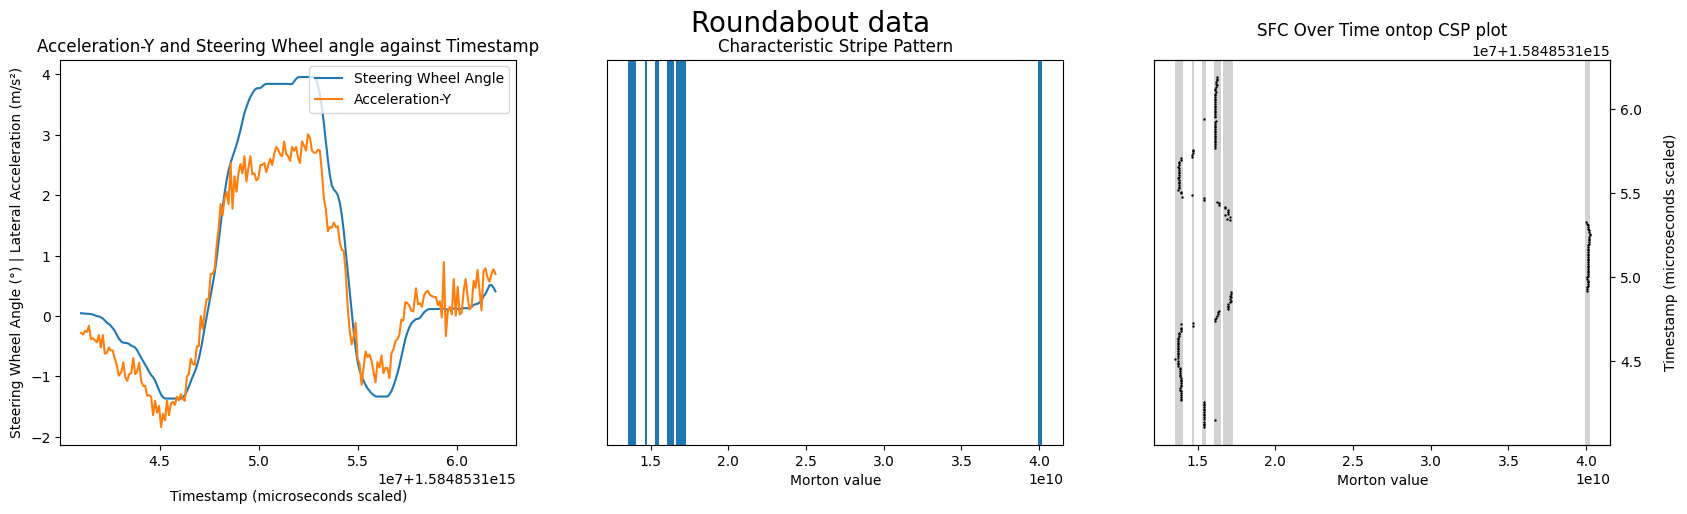

roundabout-1.csv


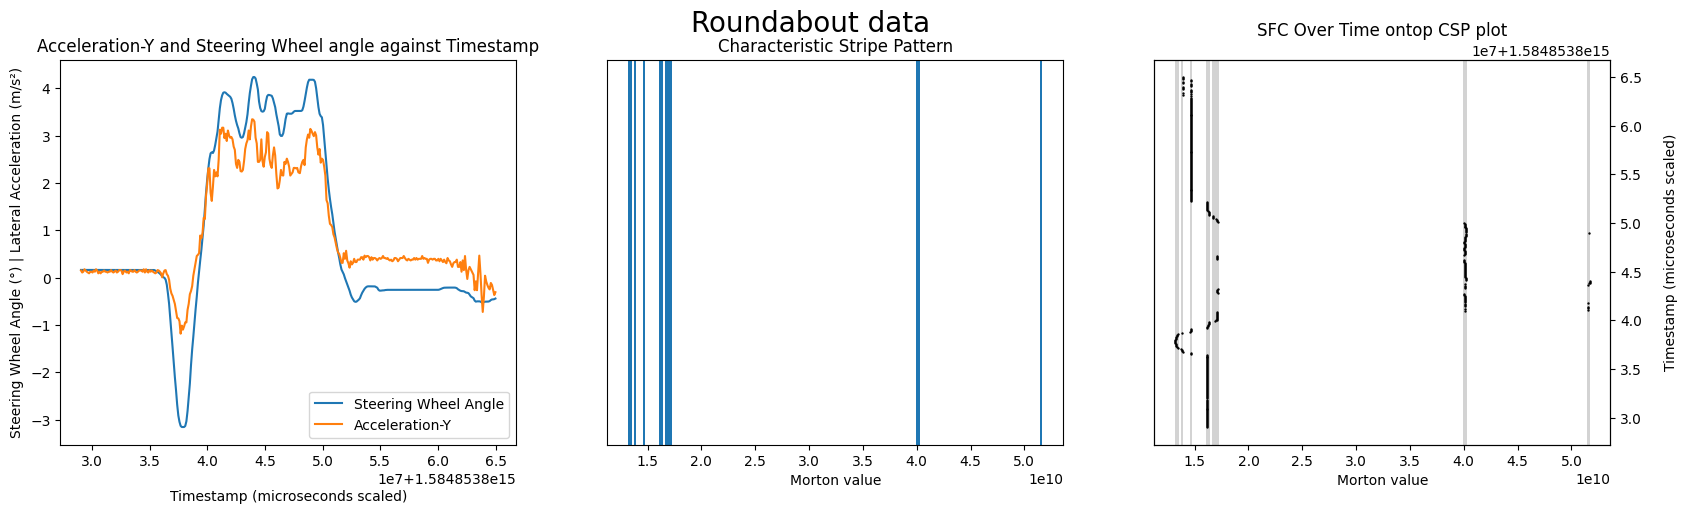

roundabout-2.csv


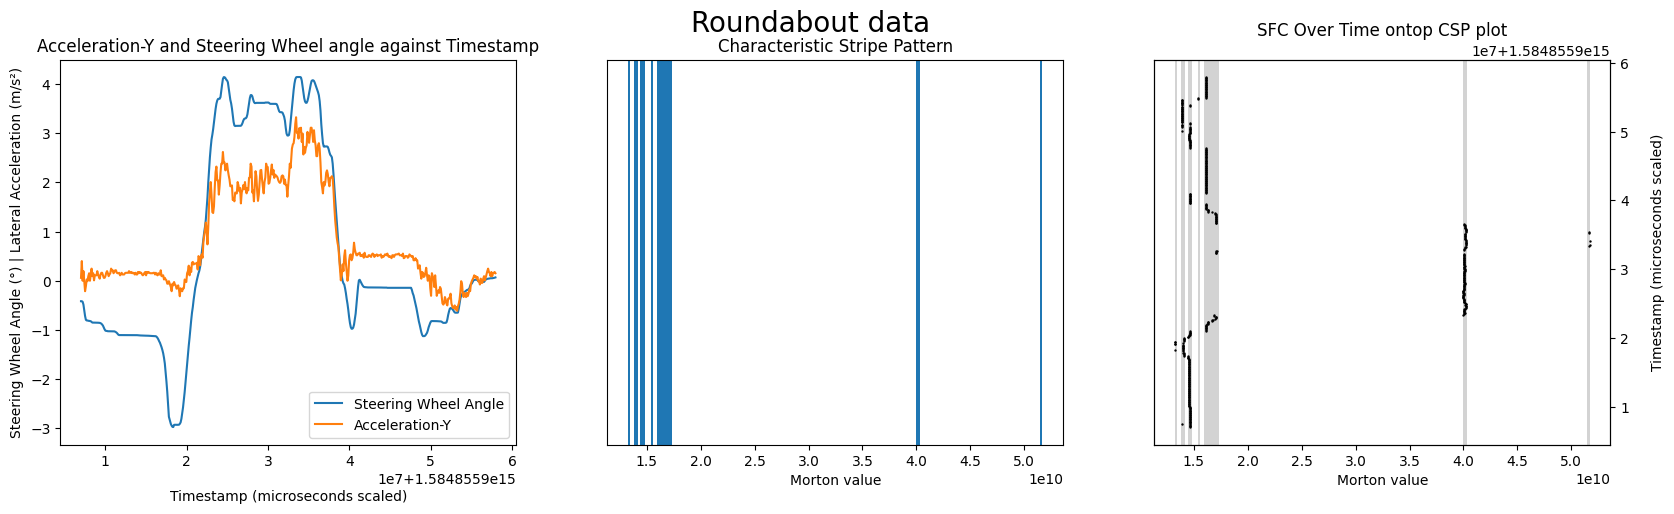

In [26]:
# Loop through lane change files, and output CSP, SFC-over-time and Sensor/time plots
folderToView = "SnowFox-Roundabout-Dataset/SnowFox-Roundabout-Dataset/Extracted_Roundabouts/combined/"

# Code adapted from: https://stackoverflow.com/questions/70897491/using-python-pandas-to-loop-over-several-csv-files-in-a-folder-and-make-changes
for file in sorted(os.listdir(folderToView)):
    print(file)
    fullPath = f'{folderToView}/{file}'
    df = pd.read_csv(fullPath, sep=';')
    
    # Confirm time is aligned between the steering and acceleration sensors
    # print(df['sampleTimeStamp.seconds'].equals(df['sampleTimeStamp.seconds.1']))
    #print(df.isnull().values.any())
    
    
    # output in one row
    # outputting in same row based on: https://towardsdatascience.com/plot-multiple-graphics-in-the-same-figure-using-python-1cbe5a23e89f and https://www.statology.org/pandas-subplots/ and https://stackoverflow.com/questions/49006699/plot-two-pandas-data-frames-side-by-side-each-in-subplot-style
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
    
    # OUTPUT IN ONE ROW
    # output: sensor against ts
    df.plot(x='ts', y=['SteeringWhlAngle', 'IMULatAcceleration'], ax=ax[0])
    ax[0].set_xlabel('\nTimestamp (microseconds scaled)')
    ax[0].set_ylabel('Steering Wheel Angle (°) | Lateral Acceleration (m/s\u00B2)')
    ax[0].set_title('Acceleration-Y and Steering Wheel angle against Timestamp')
    ax[0].legend(['Steering Wheel Angle', 'Acceleration-Y'])
    # output: CSP


    # add offset and factor multiply
    df['IMULgtAcceleration']=df['IMULgtAcceleration'].add(OFFSET)
    df['IMULatAcceleration']=df['IMULatAcceleration'].add(OFFSET)
    df['SteeringWhlAngle']=df['SteeringWhlAngle'].add(OFFSET)

    df['IMULgtAcceleration'] = df.apply(lambda x: int(x['IMULgtAcceleration']*FACTOR_MULTIPLY) , axis=1)
    df['IMULatAcceleration'] = df.apply(lambda x: int(x['IMULatAcceleration']*FACTOR_MULTIPLY) , axis=1)
    df['SteeringWhlAngle'] = df.apply(lambda x: int(x['SteeringWhlAngle']*FACTOR_MULTIPLY) , axis=1)
    
    # Morton encoding
    df['morton'] = df.apply(set_value, axis=1)

    
    # 'bins' explained: https://www.metabase.com/glossary/bin
    ax[1].hist(df['morton'], bins=200)

    min = df['morton'].min()
    max = df['morton'].max()
    max = 30000000000
    #max = 20000000000

    # limit y axis to 1 to show binary presence of data point
    ax[1].set_ylim([0,1])
    ax[1].set_yticks([])
    #plt.xlim(1,max)
    # limit x axis to take only "lane change relevant" data
    #plt.xlim(9000000000,13000000000)
    ax[1].set_xlabel('Morton value')

    ax[1].set_title("Characteristic Stripe Pattern")

    #plt.show()
    
    # output: SFC-over-time
    #fig, ax = plt.subplots()

    ax[2].hist(df['morton'], bins=200, color='lightgray')
    ax[2].set_ylim([0,1])
    ax[2].set_yticks([])
    #ax.set_xlim([0, 40000000000])

    ax2 = ax[2].twinx()

    ax2.scatter(x=df['morton'],y=df['ts'], c='black', s=0.5)

    ax[2].set_xlabel('Morton value')

    ax2.set_title("SFC Over Time ontop CSP plot")
    ax2.set_ylabel('\nTimestamp (microseconds scaled)')
    fig.suptitle('Roundabout data', fontsize=20)


    plt.show()
    